___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
# Checking the shape of one image
X_train[10].shape

(28, 28)

In [6]:
X_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

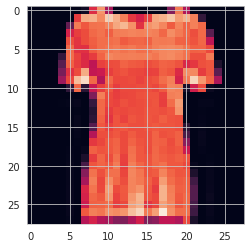

In [7]:
plt.imshow(X_train[10])
# plt.matshow(X_train[10])

In [8]:
y_train[10]

0

In [9]:
y_train.shape

(60000,)

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [12]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [13]:
y_train[10]

0

In [14]:
classes[y_train[10]]

'T-shirt/top'

In [15]:
classes[int(y_train[10])]

'T-shirt/top'

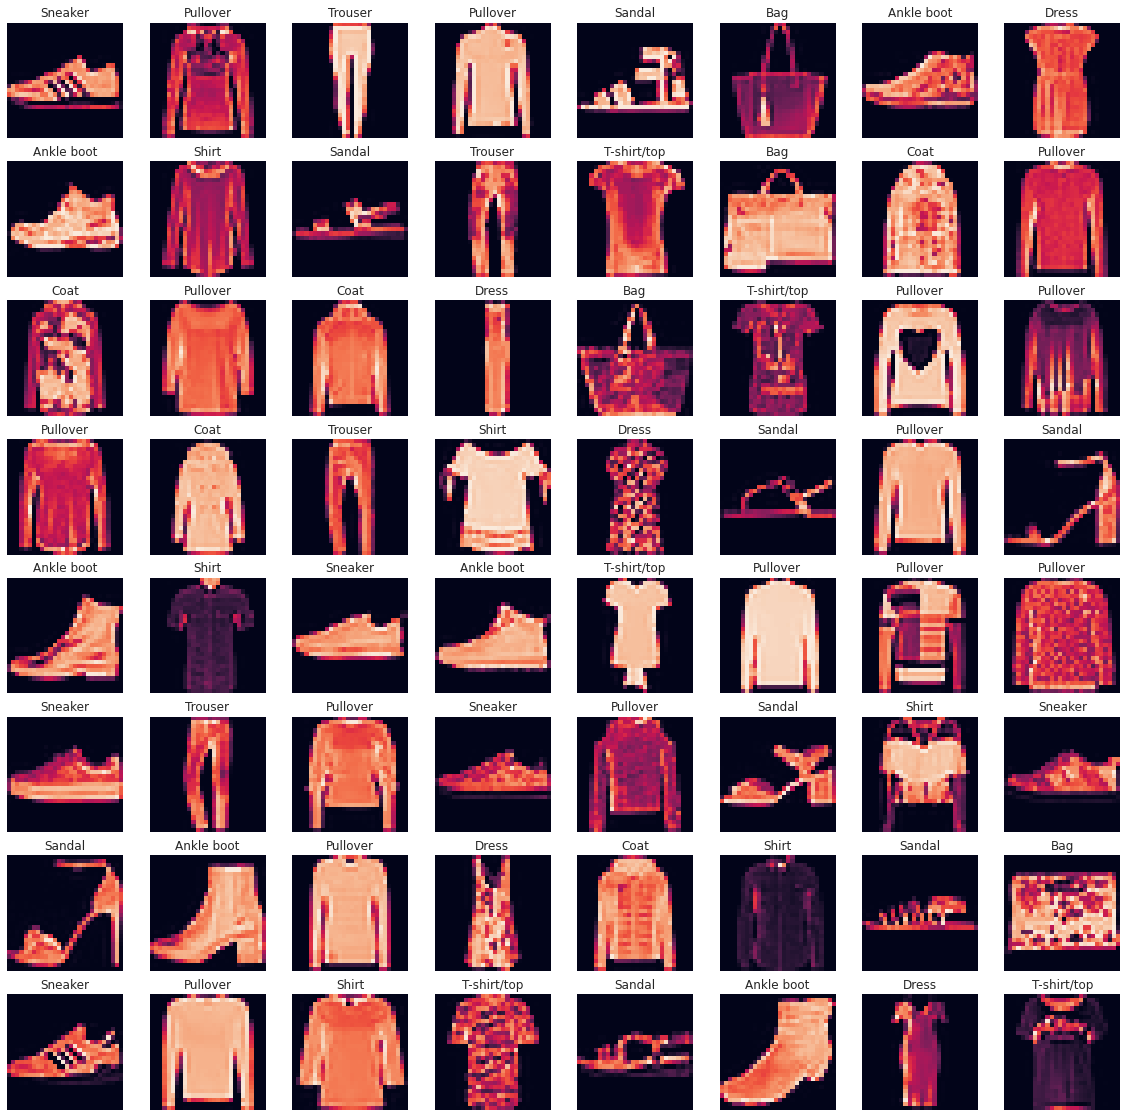

In [16]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [17]:
X_train[10].min()

0

In [18]:
X_train[10].max()

255

In [19]:

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [20]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [21]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [25]:
y_train.shape

(60000,)

In [26]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [27]:
y_train[9]

5

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [29]:
#model = Sequential()

#model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

#model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid

#model.add(Flatten())

#model.add(Dense(128, activation='relu'))

#model.add(Dense(10, activation='softmax'))

#model.compile(loss='categorical_crossentropy',
#              optimizer='adam',
 #             metrics=['accuracy'])

In [30]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 28)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 28)        7084      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 28)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 28)          0

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [34]:
model.fit(X_train, Y_train, batch_size=32, epochs=25, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/25
1875/1875 [==============================] - 10s 4ms/step - loss: 0.5374 - accuracy: 0.8013 - val_loss: 0.3759 - val_accuracy: 0.8639
Epoch 2/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3700 - accuracy: 0.8638 - val_loss: 0.3120 - val_accuracy: 0.8850
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3257 - accuracy: 0.8770 - val_loss: 0.3034 - val_accuracy: 0.8874
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3017 - accuracy: 0.8876 - val_loss: 0.2946 - val_accuracy: 0.8872
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2843 - accuracy: 0.8939 - val_loss: 0.2647 - val_accuracy: 0.9027
Epoch 6/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2703 - accuracy: 0.8981 - val_loss: 0.2637 - val_accuracy: 0.9026
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2612 - accuracy: 0.9024 - val_loss: 0.2551 - val_accuracy

In [35]:
model.metrics_names

['loss', 'accuracy']

In [36]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.537,0.801,0.376,0.864
1,0.370,0.864,0.312,0.885
2,0.326,0.877,0.303,0.887
3,0.302,0.888,0.295,0.887
4,0.284,0.894,0.265,0.903


**TASK 7: Plot values of metrics you used in your model.**

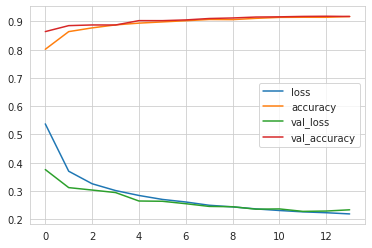

In [37]:
summary.plot();

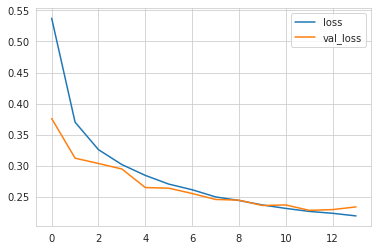

In [38]:
summary[["loss", "val_loss"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22798657417297363
Test accuracy: 0.9175999760627747


## Prediction

In [41]:
pred_prob = model.predict(X_test)

In [42]:
y_pred = np.argmax(pred_prob, axis=1)

In [43]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1000
           1       1.00      0.99      0.99      1000
           2       0.86      0.89      0.87      1000
           3       0.93      0.92      0.92      1000
           4       0.83      0.90      0.86      1000
           5       0.98      0.99      0.99      1000
           6       0.79      0.72      0.75      1000
           7       0.97      0.96      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [45]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [46]:
print(confusion_matrix(y_test, y_pred))

[[870   0  17  14   6   0  89   0   4   0]
 [  0 987   0   8   2   0   2   0   1   0]
 [ 18   0 886   6  55   0  35   0   0   0]
 [ 11   1  11 917  35   0  25   0   0   0]
 [  0   0  42  20 895   0  43   0   0   0]
 [  0   0   0   0   0 990   0   8   0   2]
 [102   0  77  23  74   0 721   0   3   0]
 [  0   0   0   0   0   9   0 960   0  31]
 [  4   1   0   3   5   3   3   2 978   1]
 [  1   0   0   0   0   4   0  23   0 972]]


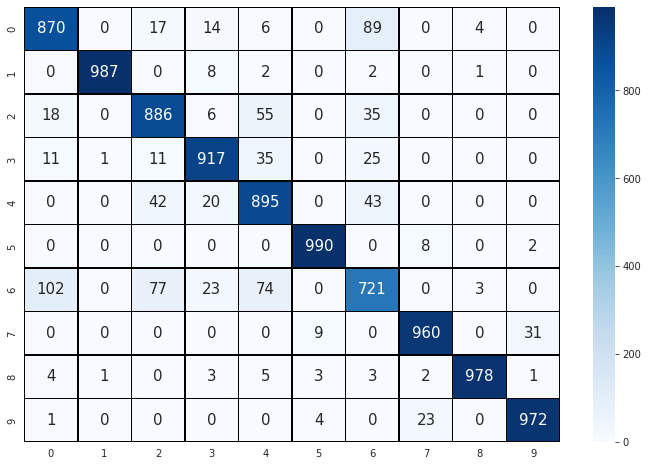

In [48]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [63]:
my_number = X_test[3]

In [64]:
my_number.shape

(28, 28, 1)

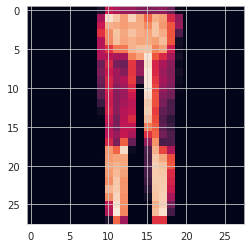

In [65]:
plt.imshow(my_number.reshape(28,28));

In [66]:
pred_prob = model.predict(my_number.reshape(1,28,28,1))
pred_prob

array([[4.1717553e-07, 9.9998903e-01, 1.1247750e-07, 9.0018648e-06,
        2.3159801e-07, 2.5654869e-12, 1.2715099e-06, 2.0587878e-18,
        3.0997476e-09, 2.8773769e-12]], dtype=float32)

In [67]:
y_pred = np.argmax(pred_prob)
y_pred

1

In [68]:
model.save("cnn-2.h5")

In [69]:
model=tf.keras.models.load_model('cnn-2.h5')

In [70]:
pred=model.predict(np.expand_dims(X_test[5],axis=0))

In [71]:
np.argmax(pred)

1

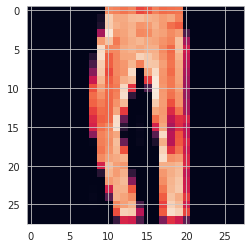

In [72]:
plt.imshow(X_test[5].reshape(28,28))

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___